In [1]:
# Import necessary libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models

# Import TensorFlow
import tensorflow as tf

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    "C:/Users/AsmaA/Desktop/Neural Networks/Project/Train",
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
)

Found 17028 images belonging to 38 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    "C:/Users/AsmaA/Desktop/Neural Networks/Project/Train",
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

Found 4257 images belonging to 38 classes.


In [ ]:
num_classes = 38  # Number of classes in the classification task
batch_size = 32  # Batch size used during training

# Load pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Change input shape

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/5
533/533 [==============================] - 2934s 5s/step - loss: 1.2474 - accuracy: 0.6524 - val_loss: 0.4645 - val_accuracy: 0.8715
Epoch 2/5
533/533 [==============================] - 2975s 6s/step - loss: 0.5370 - accuracy: 0.8392 - val_loss: 0.3482 - val_accuracy: 0.8941
Epoch 3/5
533/533 [==============================] - 2911s 5s/step - loss: 0.3973 - accuracy: 0.8752 - val_loss: 0.2916 - val_accuracy: 0.9096
Epoch 4/5
533/533 [==============================] - 3123s 6s/step - loss: 0.3227 - accuracy: 0.8972 - val_loss: 0.2641 - val_accuracy: 0.9154
Epoch 5/5
533/533 [==============================] - 3034s 6s/step - loss: 0.2716 - accuracy: 0.9090 - val_loss: 0.2402 - val_accuracy: 0.9222


In [ ]:
test_set = test_datagen.flow_from_directory(
    "C:/Users/AsmaA/Desktop/Neural Networks/Project/Test",
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Found 380 images belonging to 38 classes.
12/12 [==============================] - 48s 4s/step - loss: 0.2614 - accuracy: 0.9237
Test Accuracy: 92.37%


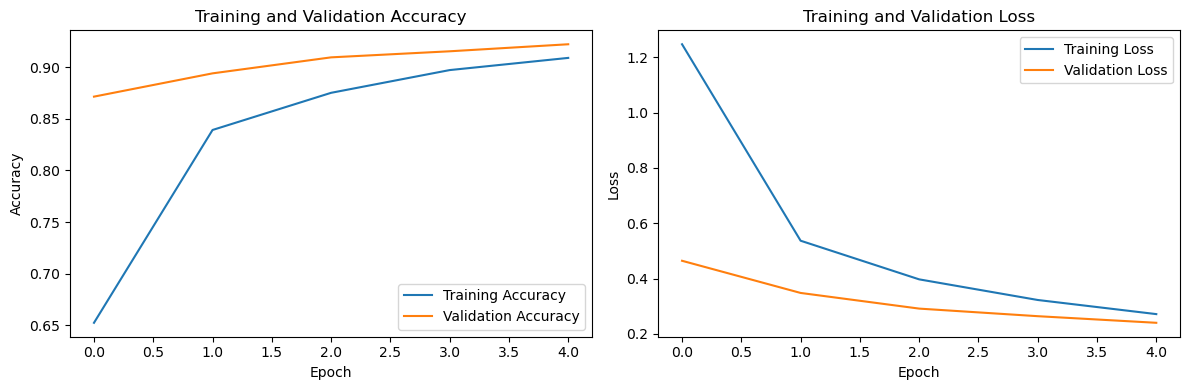

In [ ]:
plt.figure(figsize=(12, 4))
# Plot Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Plot Training Loss and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 238ms/step
Test Image: C:\Users\AsmaA\Desktop\Neural Networks\Project\Test\Corn_(maize)___healthy\0ad1f85a-765f-43e5-8b7b-4a7521be768d___R.S_HL 5520 copy 2.jpg
Predicted Class: Corn_(maize)___healthy (Class Number: 10)


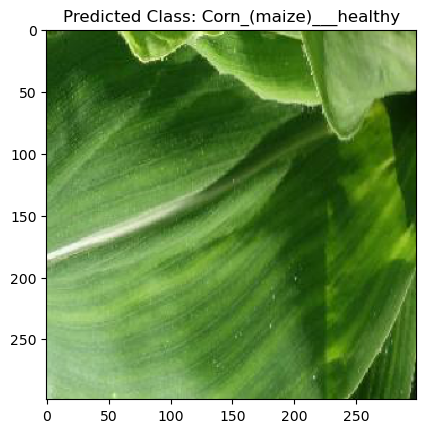

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
random_index = random.randint(0, len(test_set.filenames) - 1)
sample_path = os.path.join('C:\\Users\\AsmaA\\Desktop\\Neural Networks\\Project\\Test', test_set.filenames[random_index])

img = load_img(sample_path, target_size=(299, 299))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale pixel values

prediction = model.predict(img_array)
predicted_class_number = np.argmax(prediction)

class_name = [k for k, v in test_set.class_indices.items() if v == predicted_class_number][0]

print(f'Test Image: {sample_path}')
print(f'Predicted Class: {class_name} (Class Number: {predicted_class_number})')
plt.imshow(img)
plt.title(f'Predicted Class: {class_name}')
plt.show()